<a href="https://colab.research.google.com/github/sharminema05/Assignment/blob/main/(2215151006)SIM_Lab_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample 1 Mean: 47.75
Sample 2 Mean: 55.21
t-Statistic: -3.76
Degrees of Freedom: 96.70
p-Value: 0.0003
Confidence Interval of Mean Difference: [-10.77, -4.17]
Reject the null hypothesis. The means of the two samples are significantly different.


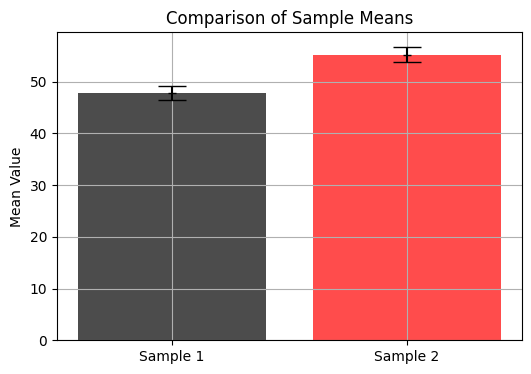

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate random samples from normal distributions
mu1, sigma1, n1 = 50, 10, 50  # Mean, standard deviation, sample size for sample 1
mu2, sigma2, n2 = 55, 12, 50  # Mean, standard deviation, sample size for sample 2

data1 = np.random.normal(mu1, sigma1, n1)  # Sample 1 data
data2 = np.random.normal(mu2, sigma2, n2)  # Sample 2 data

# Perform independent two-sample t-test (Welch's t-test)
t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

# Calculate mean difference, standard error, degrees of freedom, and confidence interval
mean_diff = np.mean(data1) - np.mean(data2)  # Mean difference
std_err = np.sqrt(np.var(data1, ddof=1)/n1 + np.var(data2, ddof=1)/n2)  # Standard error

# Calculate degrees of freedom (using Welch-Satterthwaite equation)
df = (std_err**4) / ((np.var(data1, ddof=1)/n1)**2 / (n1-1) + (np.var(data2, ddof=1)/n2)**2 / (n2-1))
ci = stats.t.interval(0.90, df, loc=mean_diff, scale=std_err)

# Print statistical results
print(f"Sample 1 Mean: {np.mean(data1):.2f}")
print(f"Sample 2 Mean: {np.mean(data2):.2f}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {df:.2f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.2f}, {ci[1]:.2f}]")

# Hypothesis testing decision
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

# Visualization of the means with error bars
plt.figure(figsize=(6, 4))
plt.bar(["Sample 1", "Sample 2"], [np.mean(data1), np.mean(data2)], color=['black', 'red'], alpha=0.7)
plt.errorbar([0, 1], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1)/np.sqrt(n1), np.std(data2)/np.sqrt(n2)], fmt='k_', capsize=10)
plt.title("Comparison of Sample Means")
plt.ylabel("Mean Value")
plt.grid(True)
plt.show()

# Conclusion:
# Based on the two-sample t-test, the p-value (0.00029) is less than the significance level (0.05),
# which leads to rejecting the null hypothesis. Therefore, we conclude that there is a
# statistically significant difference between the means of the two samples.
